## 实验一：对Breast Cancer数据集进行数据探索与数据预处理操作

从以下网址下载数据集
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

### 一、了解数据

1.打开下载的数据集文件，查看数据的前5行

In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("./python_data/dataR2.csv")
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


2.显示数据的列名、索引情况

In [2]:
print(df.index,'\n')
print(df.columns)

RangeIndex(start=0, stop=116, step=1) 

Index(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin',
       'Resistin', 'MCP.1', 'Classification'],
      dtype='object')


3.显示数据的形状、基本信息、类型

In [3]:
df.shape

(116, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


4.调用describe()函数进一步查看数据特征整体情况

In [5]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


6.对数据集的含义及情况做大致描述（采用文字）

数据集的维度为 116 * 10 的矩阵，共有10个属性（列）和116组数据（行），有 10 个预测变量，都是定量的和一个二元因变量

7.患病数据和健康数据分别是多少

In [6]:
print('患病数据有：','\n',df[df.iloc[:,9]==2].iloc[:,9].count())
print()
print('健康数据有：','\n',df[df.iloc[:,9]==1].iloc[:,9].count())

患病数据有： 
 64

健康数据有： 
 52


8.年龄在25-50之间的数据

In [7]:
df[(df.iloc[:,0]>=25) & (df.iloc[:,0]<=50)]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
10,34,21.470000,78,3.469,0.667436,14.5700,13.110000,6.92000,354.600,1
11,29,23.010000,82,5.663,1.145436,35.5900,26.720000,4.58000,174.800,1
12,25,22.860000,82,4.090,0.827271,20.4500,23.670000,5.14000,313.730,1
14,38,23.340000,75,5.782,1.069670,15.2600,17.950000,9.35000,165.020,1
15,44,20.760000,86,7.553,1.600000,14.0900,20.320000,7.64000,63.610,1
16,47,22.030000,84,2.869,0.590000,26.6500,38.040000,3.32000,191.720,1
19,32,36.512637,87,14.026,3.009980,49.3727,5.100000,17.10223,588.460,1
20,36,28.576676,86,4.345,0.921719,15.1248,8.600000,9.15390,534.224,1


9.显示特征是Age、BMI、MCP.1的第4-10数据

In [8]:
df.loc[3:9,['Age','BMI','MCP.1']]

,Age,BMI,MCP.1
3,68,21.367521,928.220
4,86,21.111111,773.920
5,49,22.854458,530.410
6,89,22.700000,1256.083
7,76,23.800000,280.694
8,73,22.000000,136.855
9,75,23.000000,318.302


### 二、数据预处理

#### 1.缺失值处理   
检查数据的缺失值情况，若有缺失值，统计各特征缺失值多少情况，并做出合理处理，如值替换等

In [9]:
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

#### 2.重复值检测，如有重复值，做删除处理

In [10]:
df.drop_duplicates(keep=False)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


#### 3.利用箱型图对Glucose做异常值检测,说明有无异常值，如有异常值，异常值个数是多少，分别是？

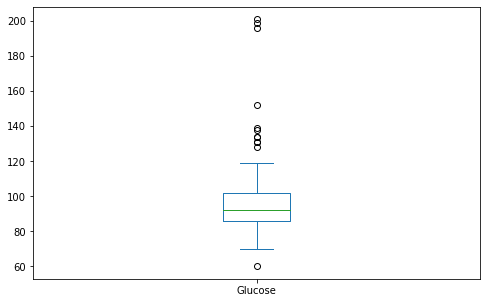

IQR:16.25
Q_LOW:61.375
Q_UP:126.375

异常值共有:12

47    60
Name: Glucose, dtype: int64

78     201
87     196
88     199
89     139
90     128
93     134
94     131
105    134
108    131
109    152
115    138
Name: Glucose, dtype: int64


In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
df.loc[:,'Glucose'].plot.box()
plt.show()

df_Glucose=df.loc[:,'Glucose']
df_Glucose.head()

IQR=df_Glucose.quantile(0.75)-df_Glucose.quantile(0.25)
val_low=df_Glucose.quantile(0.25)-1.5*IQR
val_up=df_Glucose.quantile(0.75)+1.5*IQR
print('IQR:{}'.format(IQR))
print('Q_LOW:{}'.format(val_low))
print('Q_UP:{}'.format(val_up))

print()

print('异常值共有:{}'.format(df_Glucose[df_Glucose<=val_low].count()+df_Glucose[df_Glucose>=val_up].count()))
print()
print(df_Glucose[df_Glucose<=val_low])
print()
print(df_Glucose[df_Glucose>=val_up])

#### 4.对检测的异常值进行过滤

In [12]:
df_change=df_Glucose[(df_Glucose>=val_low)&(df_Glucose<=val_up)]
df_change.describe()

count    104.000000
mean      92.317308
std       10.460526
min       70.000000
25%       85.000000
50%       92.000000
75%      100.000000
max      119.000000
Name: Glucose, dtype: float64

#### 5.对MCP.1进行最小-最大规范化

In [13]:
#（1）自编最小-最大规范化函数。
df_MCP=df.loc[:,'MCP.1']
df_MCP.describe()
min=df_MCP.describe().iloc[3]
max=df_MCP.describe().iloc[7]
#print(min,max)
n=0
for i in df_MCP:
    df_MCP.iloc[n]=(i - min) / (max - min)
    n=n+1
print(df_MCP)

C:\Users\CqC33\AppData\Local\Temp\ipykernel_25256\561018846.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MCP.iloc[n]=(i - min) / (max - min)


0      0.224659
1      0.255926
2      0.307912
3      0.533934
4      0.440565
         ...   
111    0.134568
112    0.172043
113    0.162294
114    0.209741
115    0.026774
Name: MCP.1, Length: 116, dtype: float64


#### 6.相关性，所有特征之间的相关性情况

In [14]:
# 欧式距离（Eulidean distance）
def euclidean(x, y):
    return np.sqrt(np.sum((x-y)**2))

# 曼哈顿距离(Manhattan distance)
def manhattan(x,y):
    return np.sum(np.abs(x-y))

#切比雪夫距离(Chebyshev distance)
def chebyshev(x,y):
    return np.max(np.abs(x-y))

# 闵可夫斯基距离(Minkowski distance)
def minkowski(x,y,p):
    return np.sum(np.abs(x-y)**p)**(1/p)

# 汉明距离(Hamming distance)
def hamming(x, y):
    return np.sum(x!=y)/len(x)

# 余弦距离
def cos_similarity(x, y):
    return np.dot(x,y)/(np.linalg.norm(x)*np.linalg.norm(y))

from scipy.spatial.distance import pdist
x=df.iloc[:,0]
y=df.iloc[:,1]
X=np.vstack([x,y])  #按垂直方向（行顺序）堆叠数组构成一个新的数组，堆叠的数组需要具有相同的维度

print('Age与BMI的距离为：')
d1= pdist(X, 'euclidean')
print('欧式距离：',d1)

d2=pdist(X,'cityblock')
print('曼哈顿距离：',d2)

d3=pdist(X,'chebyshev')
print('切比雪夫距离：',d3)

d4=pdist(X,'minkowski',p=2)
print('闵可夫斯基距离：',d4)

d5=pdist(X,'cosine')
print('余弦相似性：',1-d5) 

Age与BMI的距离为：
欧式距离： [367.49636536]
曼哈顿距离： [3479.25514594]
切比雪夫距离： [66.3]
闵可夫斯基距离： [367.49636536]
余弦相似性： [0.94794654]


<AxesSubplot:>

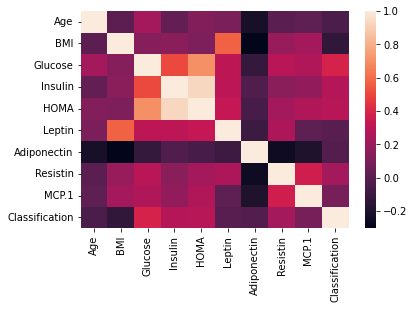

In [15]:
# 通过热力图可视化数据相关性
from string import ascii_letters
import seaborn as sns

sns.heatmap(df.corr())

#### 7.离散化。
等距离散化
使用Pandas中的cut方法，对BMI实现等距离散化分组，根据中国标准BMI值: 正常:18.5-23.9、超重:≥24、偏胖:24～27.9、肥胖:≥28划分

In [16]:
BMI_groups1=pd.cut(df['BMI'],bins=[0,18.5,23.9,27.9,100],labels=['偏瘦','正常','偏胖','肥胖'])
#print(BMI_groups1)
print(df['Classification'].groupby(BMI_groups1).count())

BMI
偏瘦     1
正常    36
偏胖    25
肥胖    54
Name: Classification, dtype: int64


#### 8.等频离散化，每箱的数据个数约为总数的四分之一

In [17]:
BMI_groups2=pd.qcut(df['BMI'],4)
BMI_groups2

0      (22.973, 27.662]
1      (18.369, 22.973]
2      (22.973, 27.662]
3      (18.369, 22.973]
4      (18.369, 22.973]
             ...       
111    (22.973, 27.662]
112    (22.973, 27.662]
113    (31.241, 38.579]
114    (22.973, 27.662]
115    (22.973, 27.662]
Name: BMI, Length: 116, dtype: category
Categories (4, interval[float64, right]): [(18.369, 22.973] < (22.973, 27.662] < (27.662, 31.241] < (31.241, 38.579]]

### 三.数据可视化
1. 绘制年龄分布直方图，bins=4。
2. bar的宽度为0.8,直方为蓝色。
3. 观察绘制的直方图，简要说明年龄分布情况。

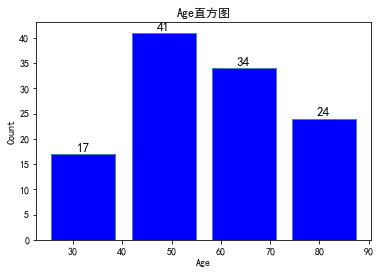

In [18]:
plt.rcParams['font.sans-serif'] = ['SimHei']

df_Age=df.loc[:,'Age']
m1=np.array(df_Age)
fre_tuple1 = plt.hist(m1, bins=4, rwidth=0.8,edgecolor='steelblue', color='blue')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age直方图')
x_loc = fre_tuple1[0] 
y_loc = fre_tuple1[1]
#print(x_loc,'\n',y_loc)
for x,y in zip(x_loc,y_loc): 
    plt.text(y+8, x+0.1, '%.0f' % x, ha='center', va= 'bottom',fontsize=13)

2.绘制BMI分布直方图，bins=[18,24,27,40],直方为绿色

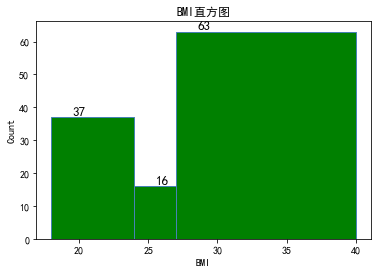

In [19]:
df_BMI=df.loc[:,'BMI']
m2=np.array(df_BMI)
fre_tuple2 = plt.hist(m2, bins=[18,24,27,40],edgecolor='steelblue', color='green')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI直方图')
x_loc = fre_tuple2[0] 
y_loc = fre_tuple2[1]
#print(x_loc,'\n',y_loc)
for x,y in zip(x_loc,y_loc): 
    plt.text(y+2, x+0.1, '%.0f' % x, ha='center', va= 'bottom',fontsize=13)


3.调用sns.countplot()函数，探索患病情况与年龄的关系。

                          Age  BMI  Glucose  Insulin  HOMA  Leptin  \
Classification age_range                                             
1              儿童           0    0        0        0     0       0   
               青年          13   13       13       13    13      13   
               中年          17   17       17       17    17      17   
               老年          22   22       22       22    22      22   
2              儿童           0    0        0        0     0       0   
               青年           4    4        4        4     4       4   
               中年          43   43       43       43    43      43   
               老年          17   17       17       17    17      17   

                          Adiponectin  Resistin  MCP.1  
Classification age_range                                
1              儿童                   0         0      0  
               青年                  13        13     13  
               中年                  17        17     17  
              

Text(0, 0.5, '数量')

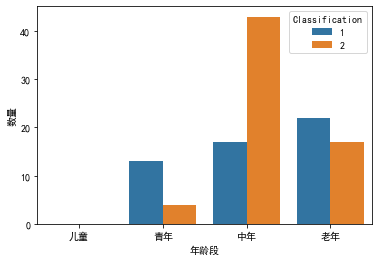

In [20]:
df['age_range']=pd.cut(df['Age'],bins=[0,18,40,66,200],labels=['儿童','青年','中年','老年']) 
print(df.groupby(['Classification','age_range']).count())
ax=sns.countplot(x=df['age_range'],hue=df['Classification'])
ax.set_xlabel('年龄段')
ax.set_ylabel('数量')

### 四、数据降维

In [21]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array(df.iloc[:,0:9],type(float))

pca = PCA(n_components=0.9,svd_solver='full') 
#如果n_components设为大于0小于1的小数且svd_solver设为’full’，则自动根据样本特征方差来决定降维到的维度数，这里n_components表示主成分的方差和所占的最小比例阈值。

newX = pca.fit_transform(X)

#print(X,'\n')

print(newX,'\n')

print(pca.explained_variance_ratio_)

[[-3.57925367e+01 -7.44835777e-01  2.12692071e+00  3.67380709e-01]
 [-1.17384302e+01 -2.12690900e+01 -2.49164316e+01 -2.22070710e+00]
 [-7.77691986e+00 -1.20650436e+01 -2.35614918e+01 -2.37409827e+00]
 [-2.45675290e+01 -8.46499813e+00 -1.40283600e+01  5.91841360e+00]
 [-1.07001627e+01 -2.31853414e+01 -2.64165291e+01  4.52141608e+00]
 [-1.87223421e+01 -1.24143472e+01  8.26309708e+00 -5.64506617e-01]
 [-2.10604591e+01 -1.66093697e+01 -3.27752533e+01  8.36816589e+00]
 [ 6.18298600e+00 -3.42519342e+01 -9.36107651e+00 -6.36874979e+00]
 [-1.15674541e+01 -2.39077008e+01 -1.28609445e+01 -1.91263101e+00]
 [-1.57335949e+01 -7.47467889e+00 -2.02805801e+01 -1.83684302e+00]
 [-2.99369583e+01  3.96737464e+00  1.64798375e+01 -4.52285641e+00]
 [-1.83599747e+01  2.10086335e+01  1.96270285e+01 -1.40153985e+01]
 [-2.64703042e+01  9.62938916e+00  2.55398120e+01 -1.05659733e+01]
 [-2.74543953e+01 -2.78373763e+00  3.17610696e+01 -1.09160931e+01]
 [-3.02526444e+01  5.25955998e+00  1.29048571e+01 -3.04499850e

c:\Users\CqC33\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


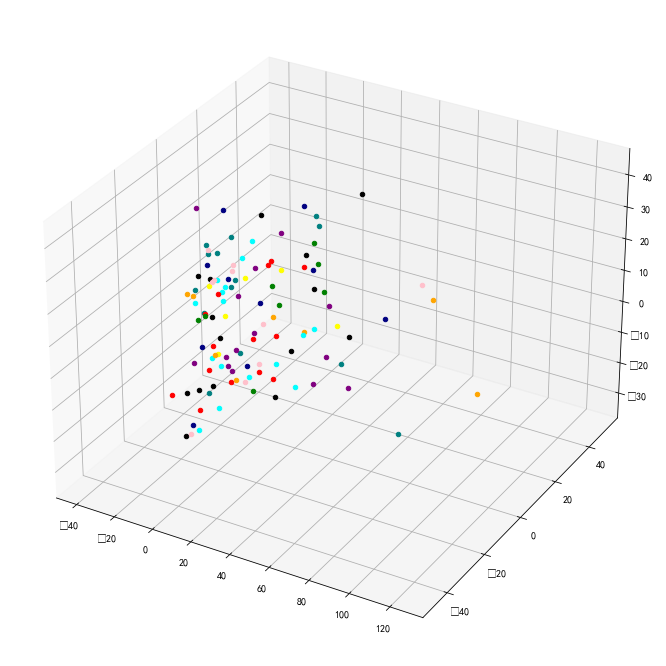

In [22]:
import random
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111, projection='3d')
color = ['yellow','black','aqua','green','teal','orange','navy','pink','purple','red']
for x in range(0,115):
    ax.scatter(newX[x,0],newX[x,1],newX[x,2],color=color[random.randint(0,9)])